# Neural network and data with fractional dimension

The purpose of this notebook is to investigate how much neural networks can recognize data sets having "fractional" dimension.

To simulate such a dataset, we first write a program which will generate the Koch snowflake, a well-known fractal with fractional (Hausdorff) dimension. The output of the function are the (x,y) coordinates of points of the Koch snowflake.  Since fractals are limiting objects, we will use the $n$-th approximation of the Koch snowflake $K_n$, i.e. the program outputs the vertices of $K_n$.

In [1]:
import math as math  
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping







## Part I: Generating the fractals (Koch snowflake)

We want a program that would take inputs

- n = number of iterations
- a = proportion of the interval to be taken out

and outputs the corresponding $K_n$. More precisely the output will be the $(x, y)$ coordinates of the turning points on $K_n$. We can then save them as a dataframe, or interpolate the points and plot the curve $K_n$.

In [2]:
# Defines a point to be an x and y coordinate.
class Point:
    def __init__(self, x, y):
         self.x = x
         self.y = y
    
    # Shifts a point's x coordinate by 'a' and its y coordinate by 'b'.
    def shift(self, a, b):
        self.setPoint(self.x + a, self.y + b)
    
    # Rotates a point by the angle theta.
    def rotate(self, theta):
        newX = self.x*math.cos(theta) - self.y*math.sin(theta)
        newY = self.x*math.sin(theta) + self.y*math.cos(theta)
        self.setPoint(newX, newY)
        
    # Scales a point by the constant 'c'.
    def scale(self, c):
        self.setPoint(c*self.x, c*self.y)
    
    # Redefines the point to be a new point (x, y).
    def setPoint(self, x, y):
        self.x = x
        self.y = y
    
    # Returns a string representing the point.
    def toString(self):
        return("(" + str(self.x) + ", " + str(self.y) + ")")

In [3]:
# Defines a line to be a pair of Point objects.
class Line:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
    
    # Returns a string that represents the line.
    def toString(self):
        print("Line = " + "(" + self.p1.toString() + ", " + self.p2.toString() + ")")
    
    # Plots the line on a set of axes.    
    def show(self):
        xVals = [self.p1.x, self.p2.x]
        yVals = [self.p1.y, self.p2.y]
        plt.plot(xVals, yVals)

In [4]:
# Defines a Curve to be a list of Line objects.
class Curve:
    def __init__(self, lineList):
        self.lineList = lineList;

    # Shifts every point on a curve, 'a' units in the x direction and 'b' units in the y direction.    
    def shift(self, a, b):
        for line in self.lineList:
            line.p1.shift(a,b)
            line.p2.shift(a,b)
    
    # Rotates every point on a curve by thr angle 'theta'.
    def rotate(self, theta):
        for line in self.lineList:
            line.p1.rotate(theta)
            line.p2.rotate(theta)
    
    # Returns a new Curve that is a copy of the originl Curve.
    def copy(self):
        newLineList = []
        for line in self.lineList:
            newP1 = Point(line.p1.x, line.p1.y)
            newP2 = Point(line.p2.x, line.p2.y)
            newLine = Line(newP1, newP2)
            newLineList.append(newLine)
        newCurve = Curve(newLineList)
        return(newCurve)
    
    # Scales every line in the Curve by a constant 'c'.
    def scale(self, c):
        for line in self.lineList:
            line.p1.scale(c)
            line.p2.scale(c)
    
    # Plots the Curve on a set of axes.
    def show(self):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        plt.xlim(-0.5, 1.5)
        plt.ylim(-0.5, 0.8)
        ax.set_aspect('equal', adjustable='box')
        for line in self.lineList:
            line.show()
            

In [5]:
def kochCurve(a, l, n, baseCurve):
    t = a*l
    theta = math.acos(t/(l-t))
    
    if(n == 0):
        return(baseCurve)
    else:
        # Makes 4 smaller copies of the original curve.
        c1 = baseCurve.copy()
        c1.scale((l-t)/2)

        c2 = baseCurve.copy()
        c2.scale((l-t)/2)

        c3 = baseCurve.copy()
        c3.scale((l-t)/2)

        c4 = baseCurve.copy()
        c4.scale((l-t)/2)

        # The first curve gets to stay where it is.

        # The second curve needs to be shifted over and rotated.
        c2.rotate(theta)
        c2.shift((l-t)/2, 0)

        # The third curve needs to be shifted over and rotated.
        c3.rotate(-theta)
        c3.shift(l/2, 0.5*math.sqrt(l*l-2*l*t))

        # The last curve just needs to be shifted.
        c4.shift((l+t)/2, 0)

        bigLineList = c1.lineList + c2.lineList + c3.lineList + c4.lineList
        newBaseCurve = Curve(bigLineList)
        return(kochCurve(a, l, n-1, newBaseCurve))

In [6]:
def make_koch_curve(a, n, plot=0, return_model=0):
    p1 = Point(0, 0)
    p2 = Point(1, 0)
    baseLine = Line(p1, p2)
    baseList = [baseLine]
    baseCurve = Curve(baseList)

    # Keep l equal to 1, and change the value of a between 0 and 1/2.
    #a = 1/4
    l = 1

    # The third parameter in 'kochCurve' is the number of iterations.
    koch_snow_flake = kochCurve(a, l, n, baseCurve)
    if plot != 0:
        koch_snow_flake.show()
    if return_model != 0:
        koch_snow_flake = koch_snow_flake.lineList
        return koch_snow_flake

### The standard Koch snowflake, a=1/3, n=3:


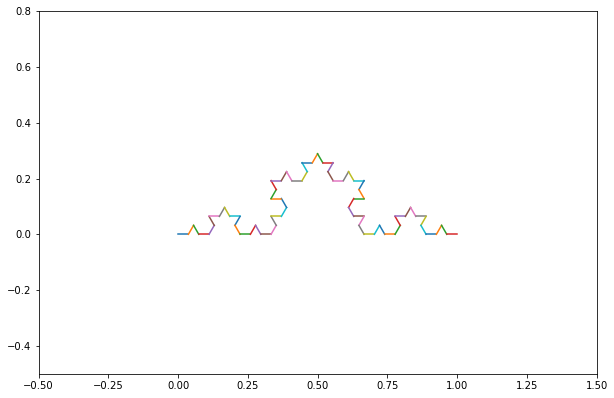

In [7]:
make_koch_curve(a=1/3, n=3, plot=1, return_model=0)

a=0.2, n=3:


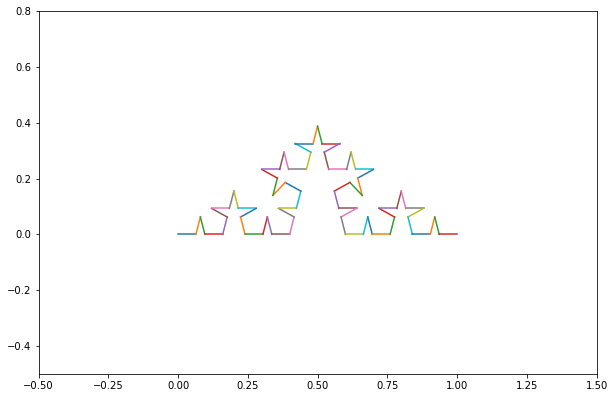

In [8]:
make_koch_curve(0.2, 3, 1, 0)

a=0.1, n=3:


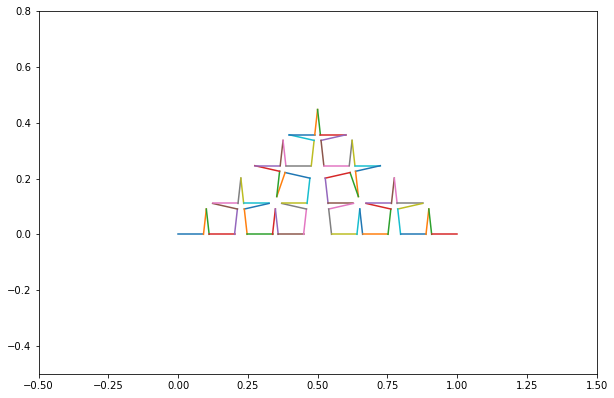

In [9]:
make_koch_curve(0.1, 3, 1, 0)

### As a approaches 0, we get the space filling curve:

### a=0.01, n=3

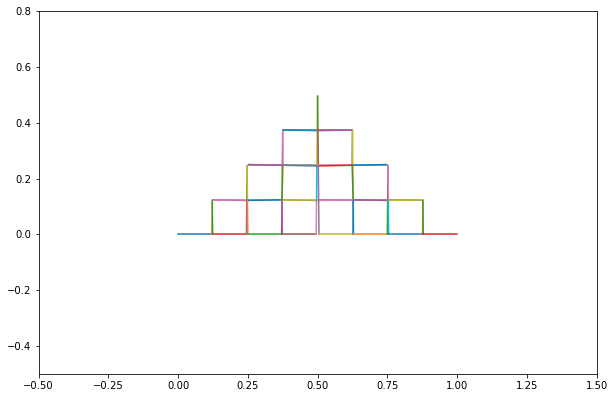

In [10]:
make_koch_curve(0.01, 3, 1, 0)

### Using n=6 it becomes more apparent why it's called space filling curve.

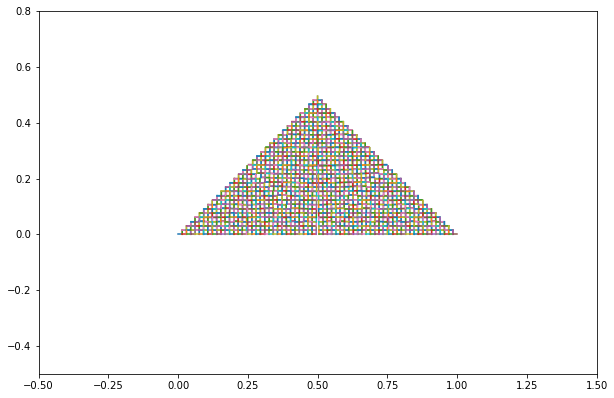

In [11]:
make_koch_curve(0.01, 6, 1, 0)

On the other hand, if a is close to 0.5, the curve is one dimensional.

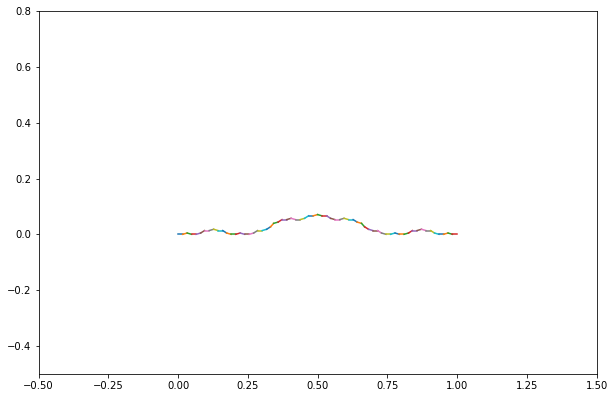

In [12]:
make_koch_curve(0.49, 3, 1, 0)

## Part II: Data preparation for the 1/5-snowflake (a=1/5)

The interesting values of a (the proportion taken out) are somewhere between 0, correponding to the space filling curve, and 1/3, which gives the regular Koch snowflake. For values between 1/3 and 1/2, the curve becomes one dimensional and so they are less interesting in terms of dimension complexity.

Therefore, we start with a=1/5, which is somewhere in the middle between 0 and 1/3.
and use n=9, the 9-th approximation $K_n$. 


In [13]:
a = 0.05
n = 9

We will use the program above to prepare a dataset to feed into a neural network.
The output of the program are the x, y coordinates of the turning points of $K_n$, where $n=9$. We will manually assign them label "1".

As a remark, there should be $2+3+4(3)+4^2(3) + ... +4^8(3) = 262145 $ number of data points.

In [14]:
def print_no_of_turning_pts(no_of_iteration):
    s=2
    for i in range(no_of_iteration):
        s = s + 3*(4**i)

    print("# of turning points in K{}:".format(no_of_iteration), s)

In [15]:
print_no_of_turning_pts(9)

# of turning points in K9: 262145


Using the parameter a, n as above, we create our snowflake which is a "curve" object defined in Part I.

In [16]:
snowflake = make_koch_curve(a, n, 0, 1)

The __getCoordinates__ function runs through a "curve" object and outputs the x, y coordinates of the turning points.

In [17]:
def getCoordinates(lineList):
    xList = []
    for line in lineList:
        xList.append(line.p1.x)
    xList.append(lineList[-1].p2.x)
    x_coords = np.array(xList)
    
    
    yList = []
    for line in lineList:
        yList.append(line.p1.y)
    yList.append(lineList[-1].p2.y)
    y_coords = np.array(yList)
    
    return x_coords, y_coords


In [18]:
x_coord, y_coord = getCoordinates(snowflake)

The length of the dataset generated matches what is expected from the calculation, so the program likely works fine.

In [19]:
len(x_coord)

262145

As mentioned before we want the turning points to have label "1", so in the dataframe containing the x, y coordinates of the turning point, we just create another constant column 1.

In [20]:
x_coord = x_coord.reshape((len(x_coord), 1))
y_coord = y_coord.reshape((len(y_coord), 1))

# combine the x, y coordinates as two side-by-side columns
X1 = np.hstack((x_coord, y_coord))

# manually assign label 1 to these points (since they're on the curve)
y1 = np.array([1 for point in X1])

The program above plots the $n$-th Koch snowflake by interpolating the vertices. Here the function __plot__ only plots the vertices themselves as a scatterplot. We will use it again later when we interpret the output of a neural network.

In [21]:
def plot(x_left_lim,    x_right_lim,
         y_bottom_lim,  y_top_lim,
         fig_size_w,    fig_size_h,
         x_arr,         y_arr,
         point_size):



    plt.figure(figsize=(fig_size_w, fig_size_h))

    plt.xlim(x_left_lim,   x_right_lim)
    plt.ylim(y_bottom_lim, y_top_lim)


    plt.scatter(x_arr, y_arr, s=point_size)
    plt.show()

Setting the parameters for reference area before plotting

In [22]:
x_left_lim = -0.1
x_right_lim = 1.1

y_bottom_lim = -0.05
y_top_lim = 0.52

fig_size_w = 12
fig_size_h = 5

x_arr = X1[:,0]
y_arr = X1[:,1]

point_size = 0.001

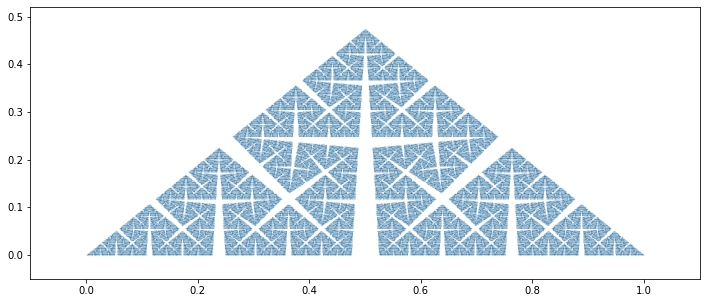

In [23]:
plot(x_left_lim,    x_right_lim,
         y_bottom_lim,  y_top_lim,
         fig_size_w,    fig_size_h,
         x_arr,         y_arr,
         point_size)

We already have the points on the snowflake labelled as 1. To train a classifier we also need points with labelled 0, indicating they are not on the snowflake. 

We do this by first creating a list of evenly spaced points along the $x$-axis, and similarly for the $y$-axis. Then we make the Cartesian product of the two arrays to create a list of square lattice points on the plane. These points will be labelled 0.

For the points that are close enough to the snowflake, it is possible that the label really should be 1, but we will ignore this for now.

In [24]:
def make_K_complement(x_left_lim,      x_right_lim,
                      y_top_lim,       y_bottom_lim,
                      x_num_of_points, y_num_of_points):


    # create the x, y coordinates
    # x in [x_left_lim, x_right_lim], y in [y_bottom_lim, y_top_lim].
    x_coord_train = np.linspace(x_left_lim, x_right_lim,  x_num_of_points)
    y_coord_train = np.linspace(y_top_lim,  y_bottom_lim, y_num_of_points)


    # create the Cartesian product of x_coord_train, y_coord_train
    X0 = np.transpose([np.tile(x_coord_train, len(y_coord_train)), np.repeat(y_coord_train, len(x_coord_train))])
    y0 = np.array([0 for point in X0])

    return X0, y0


### Experiment design aspect:

By increasing n we can obtain more label 1 points.

But we can also increase the number of label 0 points in __make_K_complement__. 

Perhaps it's better to have the dataset slightly imbalance, with 30% label 1, 70% label 0.

In [25]:
X0, y0 = make_K_complement(x_left_lim, x_right_lim,
                           y_top_lim, y_bottom_lim,
                           12*100, 5*100)
#                           12*100, 5*100)

len(X1)/(len(X0)+len(X1))

0.30406138178612646

Now we have two sets of data: 

 - X0, y0
 - X1, y1

corresponding to points on the Koch snowflake and those that are not. 
We will combine the two as a single dataset, then shuffle the index of the data points before doing a train_test_split.

The reason we shuffle the index is because as we concatenate the two datasets, the data with label 1 are at the top, and the those with label 0 are in the bottom.

In [26]:
# X_train contains 2 cols: x, y coordinates of the points
# y_train is the corresponding label (0,1)

X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((y0, y1), axis=0)


# randomize the index
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]


# check to make sure X, y have the right dimension
print(X.shape)
print(y.shape)

(862145, 2)
(862145,)


In [27]:
# make sure labels are shuffled, so we don't have all 0's then all 1's.
y_list = y.tolist()

y_list[-10:]


[1, 0, 0, 0, 0, 1, 1, 1, 0, 0]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

## Part III: Feeding the data to a neural network

Create our neural network.

In [29]:
def create_model(X_train, y_train,
                 no_of_hidden_layers,
                 hidden_activation,
                 epochs, 
                 batch_size,
                 verbose):

    model = Sequential()
    model.add(Dense(units=2,activation=hidden_activation))
    
    for i in range(no_of_hidden_layers):
        model.add(Dense(units=(no_of_hidden_layers-i)*2,activation=hidden_activation))
        
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    model.fit(x=X_train, 
          y=y_train, 
          epochs=epochs,
          batch_size=batch_size,
          #validation_data=(X_validation, y_validation),
          verbose=verbose,
          #callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)]
          )
    
    return model

Train our neural network with (X_train, y_train).

In [30]:
first_model = create_model(X_train, y_train, 18, 'elu', 30, 256,1)

Epoch 1/30
2358/2358 [==============================] - 6s 2ms/step - loss: 0.5062A: 0s - loss: 0.50
Epoch 2/30
2358/2358 [==============================] - 5s 2ms/step - loss: 0.4122
Epoch 3/30
2358/2358 [==============================] - 5s 2ms/step - loss: 0.4042
Epoch 4/30
2358/2358 [==============================] - 5s 2ms/step - loss: 0.4024
Epoch 5/30
2358/2358 [==============================] - 6s 2ms/step - loss: 0.3966
Epoch 6/30
2358/2358 [==============================] - 6s 2ms/step - loss: 0.3953
Epoch 7/30
2358/2358 [==============================] - 5s 2ms/step - loss: 0.3999
Epoch 8/30
2358/2358 [==============================] - 6s 3ms/step - loss: 0.3931
Epoch 9/30
2358/2358 [==============================] - 5s 2ms/step - loss: 0.3911
Epoch 10/30
2358/2358 [==============================] - 6s 3ms/step - loss: 0.3900
Epoch 11/30
2358/2358 [==============================] - 5s 2ms/step - loss: 0.3895
Epoch 12/30
2358/2358 [==============================] - 5s 2ms/ste

In [31]:
#model_loss = pd.DataFrame(first_model.history.history)
#model_loss.plot()

Use the trained neural network to predict whether points in (X_test, y_test) have lable 1 (on the snowflake) or 0 (not on the snowflake).

In [32]:
first_model_prediction = first_model.predict_classes(X_test)


C:\Users\ivanc\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Part IV: The result

The output above are the labels that the neural network predicts for X_test. Using these labels, we extract the points  with label 1, i.e. those the network believes belong to the Koch snowflake.

In [33]:
# First, combine X_test with the predicted labels.
prediction = np.concatenate((X_test, first_model_prediction), axis=1)

# extract the rows with label 1
to_plot = prediction[np.where(prediction[:,2] == 1)]

# After extracting these points, we can delete the label column which is not useful now.
to_plot = np.delete(to_plot, -1, axis=1)


The original curve.

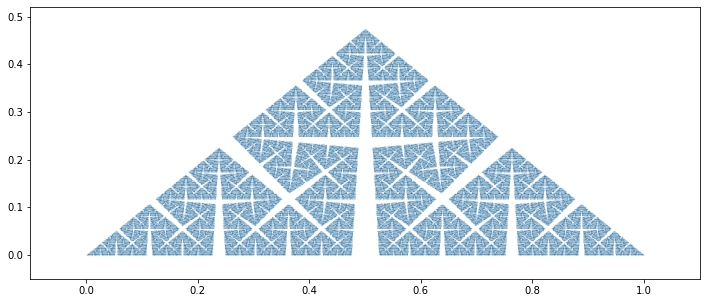

In [34]:
plot(x_left_lim,    x_right_lim,
     y_bottom_lim,  y_top_lim,
     fig_size_w, fig_size_h,
     X1[:,0],X1[:,1],
     point_size)

Here is the plot of what neural network predicts for the points in X_test.

The overall outline is there.  The darker places are where the points are concentrated. There are many lightly shaded places indicating mislabels, but since they're lightly shaded it means the mislabels are at least sparse.

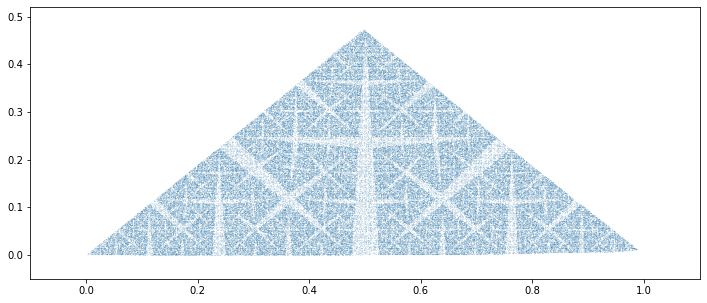

In [35]:
plot(x_left_lim,    x_right_lim,
     y_bottom_lim,  y_top_lim,
     fig_size_w, fig_size_h,
     to_plot[:,0], to_plot[:,1],
     point_size*2)